In [90]:
%pylab inline

import numpy
import scipy
import pandas

from matplotlib import pyplot

import seaborn
pylab.rcParams['figure.figsize'] = (12.0, 8.0)

Populating the interactive namespace from numpy and matplotlib


In [91]:
good_videos = ['funnybaby.avi', 'camerachanges.mp4', 'slowmovesscene.mp4']

In [92]:
files = ['interpolacion_lineal_ecm_psnr.csv', 'mas_cercano_ecm_psnr.csv', 'splines_ecm_psnr.csv']
a = pandas.DataFrame()
for f in files:
    q = pandas.read_csv(f)
    q['metodo'] = f[:-13]
    a = pandas.concat([a, q], ignore_index = True)

In [93]:
a = a[numpy.in1d(a.Video, good_videos)]

In [94]:
%cd ../../informe/graficos/

/home/martin/TP/Metodos Numericos/metnum-TP3/informe/graficos


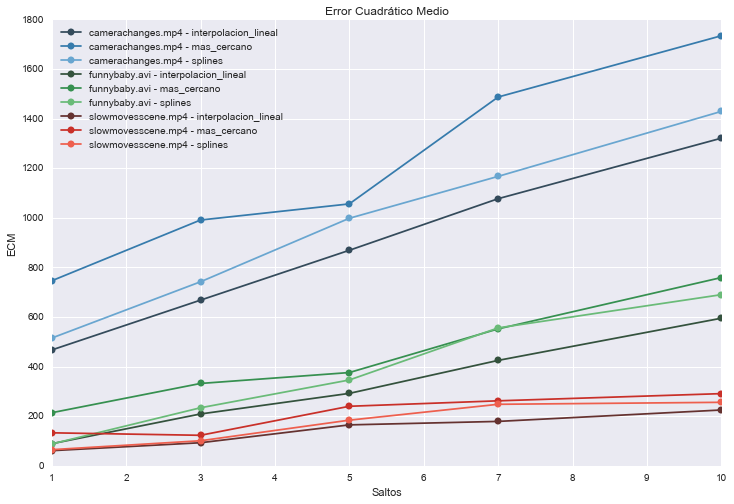

In [95]:
palettes = ['Blues_d', 'Greens_d', 'Reds_d']

for p, video in enumerate(numpy.unique(a.Video)):
    for c, metodo in enumerate(numpy.unique(a.metodo)):
        g = a[(a.metodo == metodo) & (a.Video == video)]
        pyplot.plot(g.Salto, g.PromECM, '-o', label = '{} - {}'.format(video, metodo), c = seaborn.color_palette(palette = palettes[p])[2 * c])

pyplot.title('Error Cuadrático Medio')
pyplot.xlabel('Saltos')
pyplot.ylabel('ECM')
pyplot.legend(loc = 2)

pyplot.savefig('ecm.png', bbox_inches='tight')

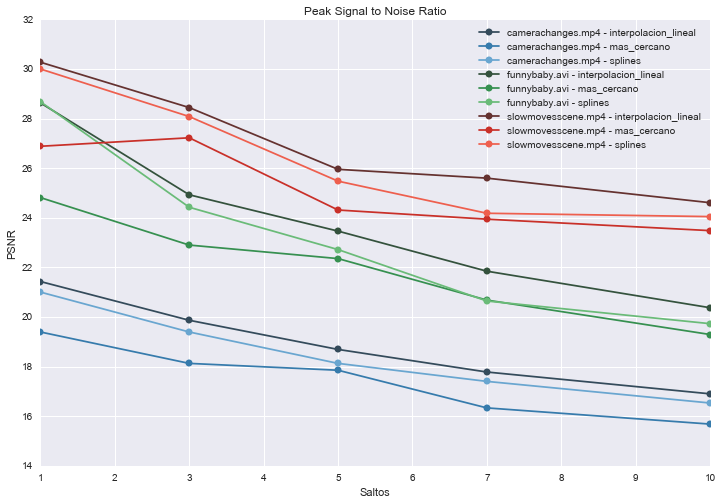

In [96]:
palettes = ['Blues_d', 'Greens_d', 'Reds_d']

for p, video in enumerate(numpy.unique(a.Video)):
    for c, metodo in enumerate(numpy.unique(a.metodo)):
        g = a[(a.metodo == metodo) & (a.Video == video)]
        pyplot.plot(g.Salto, g.PromPSNR, '-o', label = '{} - {}'.format(video, metodo), c = seaborn.color_palette(palette = palettes[p])[2 * c])

pyplot.title('Peak Signal to Noise Ratio')
pyplot.xlabel('Saltos')
pyplot.ylabel('PSNR')
pyplot.legend(loc = 0)

pyplot.savefig('psnr.png', bbox_inches = 'tight')

/usr/lib/python3.5/site-packages/pandas/core/frame.py:1942: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)
/usr/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


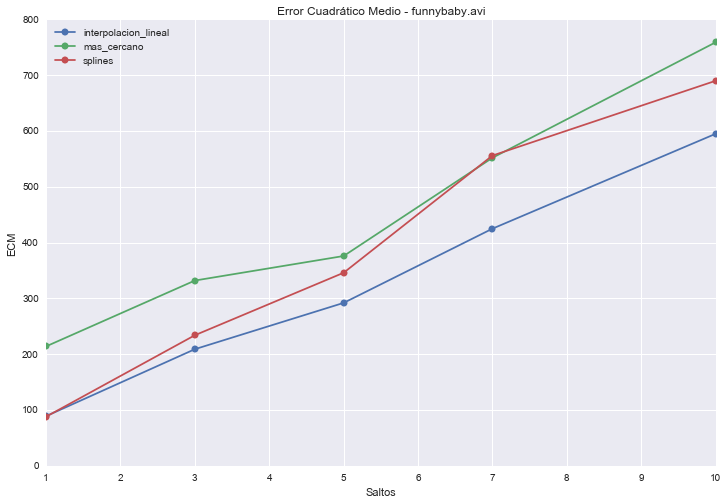

In [97]:
h = a[a.Video == 'funnybaby.avi']
for color, metodo in enumerate(numpy.unique(a.metodo)):
    g = h[a.metodo == metodo]
    pyplot.plot(g.Salto, g.PromECM, '-o', label = metodo, c = seaborn.color_palette()[color])
    
pyplot.title('Error Cuadrático Medio - funnybaby.avi')
pyplot.xlabel('Saltos')
pyplot.ylabel('ECM')
pyplot.legend(loc = 2)

pyplot.savefig('ecm_funnybaby.png', bbox_inches = 'tight')

In [98]:
%pwd

'/home/martin/TP/Metodos Numericos/metnum-TP3/informe/graficos'

In [99]:
metodos = ['cercanos', 'lineal', 'splines']

t = pandas.DataFrame()
for m in metodos:
    g = pandas.read_csv('/home/martin/TP/Metodos Numericos/metnum-TP3/src/measureTimes/{}Times'.format(m))
    g['metodo'] = m
    t = pandas.concat([t, g], ignore_index = True)

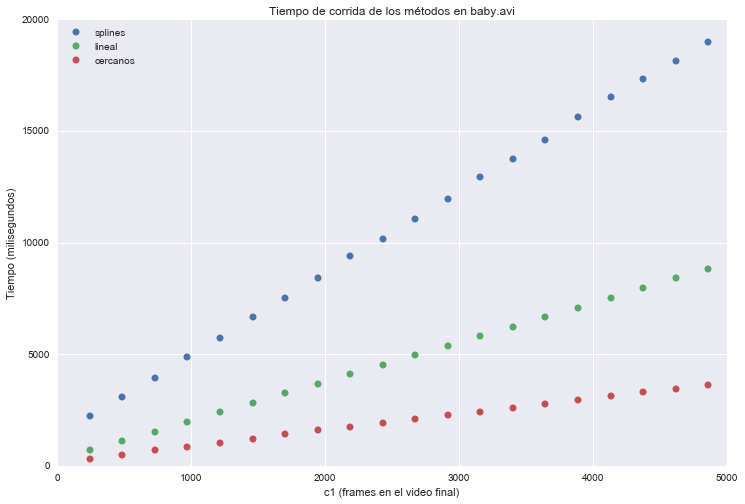

In [100]:
for m in numpy.unique(t.metodo)[::-1]:
    h = t[t.metodo == m]
    pyplot.plot(h.Salto * 243, h.time, 'o', label = m)

pyplot.title('Tiempo de corrida de los métodos en baby.avi')
pyplot.xlabel('c1 (frames en el video final)')
pyplot.ylabel('Tiempo (milisegundos)')
pyplot.legend(loc = 2)

pyplot.savefig('tiempo_baby.png', bbox_inches = 'tight')

In [101]:
r = pandas.read_csv('/home/martin/TP/Metodos Numericos/metnum-TP3/src/measureTimes/baby_reset_2.txt')

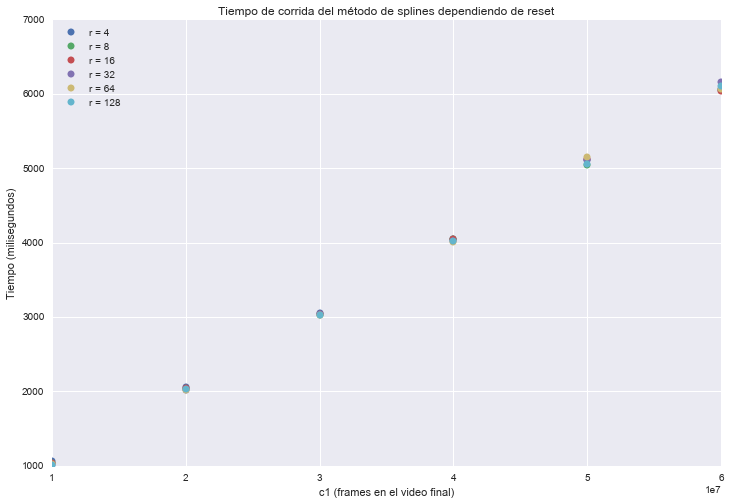

In [103]:
pyplot.gca().get_xaxis().get_offset_text()

for t in numpy.unique(r.reset):
    h = r[r.reset == t]
    pyplot.plot(h.c1, h.time, 'o', label = 'r = {}'.format(t))
    
pyplot.title('Tiempo de corrida del método de splines dependiendo de reset')
pyplot.xlabel('c1 (frames en el video final)')
pyplot.ylabel('Tiempo (milisegundos)')
pyplot.legend(loc = 2)

pyplot.savefig('tiempo_reset.png', bbox_inches = 'tight')

In [111]:
q = pandas.read_csv('/home/martin/TP/Metodos Numericos/metnum-TP3/src/resultados/splines_ecm_psnr.csv', usecols = ['Video', 'Salto', 'PromECM'])
q = q[q.Video == 'baby.avi'].drop('Video', axis = 1)# .rename(columns = {'Salto': 'cl', 'PromECM': 'ecm'})

h = pandas.read_csv('/home/martin/TP/Metodos Numericos/metnum-TP3/src/measureTimes/baby_reset_ecm.txt')
h = h.append(q).fillna('c1 (corrida sin reset)')

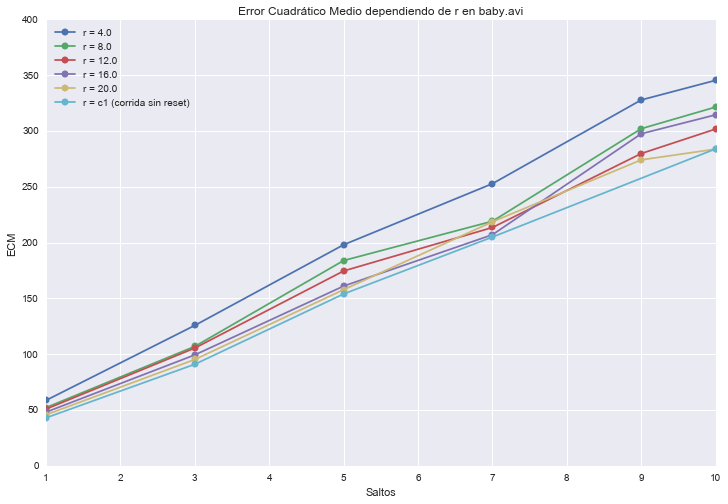

In [112]:
for r, t in h.groupby('Reset'):
    pyplot.plot(t.Salto, t.PromECM, '-o', label = 'r = {}'.format(r))

pyplot.title('Error Cuadrático Medio dependiendo de r en baby.avi')
pyplot.xlabel('Saltos')
pyplot.ylabel('ECM')

pyplot.xlim(h.Salto.min(), min(h.Salto.max(), q.Salto.max()))
pyplot.legend(loc = 0)

pyplot.savefig('ecm_reset.png', bbox_inches = 'tight')